## Importation du modèle

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import joblib
path="/content/drive/MyDrive/Projet 12/"
chemin_fichier="billets_test.xlsx"

scaler = joblib.load(path+"scaler.joblib")
reg = joblib.load(path + "reg_prediction_billets.joblib")

## Application

In [11]:
import pandas as pd
df_new = pd.read_excel(path+ chemin_fichier)


X_new_scaled = scaler.transform(df_new)

predictions = reg.predict(X_new_scaled)
probas = reg.predict_proba(X_new_scaled)

df_new["Prediction"] = predictions
df_new["Proba_Vrai"] = probas[:, 1] * 100
df_new["Proba_Faux"]=100-df_new['Proba_Vrai']

df_new.to_excel(path+"Predictions.xlsx", index=False)

print("Fichier excel sauvegardé")

Fichier excel sauvegardé


----------INFOS----------

Nombre de billets traités : 5
Vrais billets prédits : 2 soit 40.0%
Faux billets prédits : 3 soit 60.0%


 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


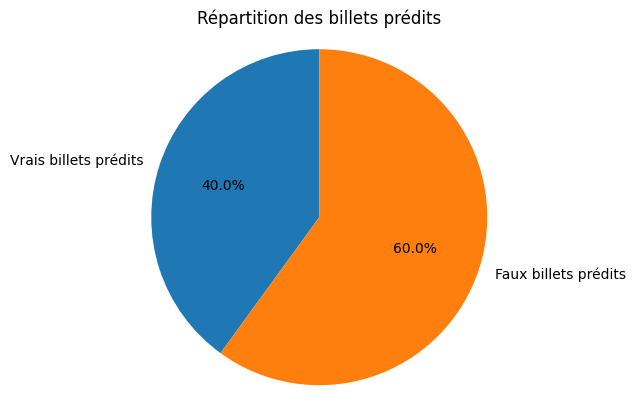

In [12]:
import matplotlib.pyplot as plt

vrais_billets_predits = df_new[df_new["Prediction"] == 1].shape[0]
faux_billets_predits = df_new[df_new["Prediction"] == 0].shape[0]


print("----------INFOS----------\n")
print(f"Nombre de billets traités : {df_new.shape[0]}")
print(f"Vrais billets prédits : {vrais_billets_predits} soit {round(vrais_billets_predits / df_new.shape[0] * 100, 2)}%")
print(f"Faux billets prédits : {faux_billets_predits} soit {round(faux_billets_predits / df_new.shape[0] * 100, 2)}%")
print(f"\n\n {'-'*300}")

labels = ['Vrais billets prédits', 'Faux billets prédits']
sizes = [vrais_billets_predits, faux_billets_predits]
explode = (0.1, 0)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des billets prédits")
plt.axis('equal')
plt.show()